# Auswertung - Verteilung der Daten

In diesem ersten Abschnitt soll die Verteilung, der bei der Evaluierung vom 12.6 - 14.6 erhobenen Daten, festgestellt werden. Dabei ist einersteits interessant wie viele Datenpunkte pro Person, Area of Interest (AOI) bzw. pro Position erhoben wurden. Dieses erste Teil der Auswertung soll daher einen ersten Überblick über die erobenen Daten gewähren und zusätzlich Indiezien darüber liefern, welche erste Limitationen für das, der Evaluation zu grundelegende, System erkannt werden können.

### Auswertungs-Fragen:
* [Frage 1: Gesamtzahl der gesammelten Daten](#cell1)
* [Frage 2: Verhältnis von “Erkannt” und “Nicht-Erkannt”](#cell2)
* [Frage 3: Verteilung der Hits auf die einzelnen AOIs](#cell3)
* [Frage 4: Verteilung der Hits auf die einzelnen Positionen](#cell4)
* [Frage 5: Verteilung der Hits auf die Clients](#cell5)
* [Frage 6: Personenbezogenen Daten](#cell6)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from IPython.display import display, HTML
import numpy as np
import json
from scipy import stats
import math

from datetime import datetime

In [2]:
root = '../1_Daten/2_processed'
file_names = []

for subdir, dirs, files in os.walk(root):
    for file in files:
        if 'annotation' not in file or '.csv' not in file:
            continue
        file_names.append(os.path.join(subdir, file).replace('\\', '/'))

# Nutzerdaten

<a id="cell1"></a>
# Frage 1: Gesamtzahl der gesammelten Daten

**Ziel:** Ersten Überblick über die Daten. Was ist die absolute Zahl an erkannten Blicken pro Nutzer. Welche Nutzer haben besonders viele Blicke, welche extrem wenig.

In [3]:
info_titles = [
    'Frames',
    'Zeitpunkt',
    'Test Person',
    'Frames mit Gesicht',
    'Frames mit Blick',
    'Alter',
    'Groesse',
    'Brille',
    'Geschlecht',
    'Bart'
]

info_data = []
giant_data_frame = pd.DataFrame()

user = pd.read_csv('../1_Daten/participants.csv', sep=',', engine='python', encoding='utf-8')

for f in file_names:
    df = pd.read_csv(f, sep=',', engine='python')
    giant_data_frame = giant_data_frame.append(df)

    # meta data
    count_total = len(df['frame'])
    last_ts = datetime.fromtimestamp(df['timestamp'][count_total - 1])
    test_person = str((df['tester'][0]))[:-1]
    age = user[['Age']].loc[int(test_person)-1].values[0] 
    size = user[['Size (cm)']].loc[int(test_person)-1].values[0] 
    glasses = user[['Glasses']].loc[int(test_person)-1].values[0] 
    gender = user[['Gender']].loc[int(test_person)-1].values[0] 
    beard = user[['Beard']].loc[int(test_person)-1].values[0]
    
    # gaze & face hits
    count_face = len(df)
    count_gaze = len(df)
    
    #bundle data
    info_data.append([count_total, last_ts, test_person, count_face, count_gaze, age, size, glasses, gender, beard])

user_data = pd.DataFrame(info_data, columns=info_titles).sort_values(by=['Frames mit Blick'], ascending=False)

#show overview of tester data
user_data

,Frames,Zeitpunkt,Test Person,Frames mit Gesicht,Frames mit Blick,Alter,Groesse,Brille,Geschlecht,Bart
30,931,2019-06-12 15:57:44,14,931,931,27,185,True,MALE,False
29,629,2019-06-12 11:02:51,05,629,629,20,180,False,MALE,False
42,595,2019-06-13 14:34:01,36,595,595,29,168,False,FEMALE,False
9,543,2019-06-13 09:39:47,24,543,543,29,169,False,FEMALE,False
37,528,2019-06-12 11:20:11,06,528,528,23,174,False,FEMALE,False
26,518,2019-06-13 13:09:04,32,518,518,20,186,False,MALE,False
8,384,2019-06-13 14:06:34,34,384,384,25,192,False,MALE,False
20,363,2019-06-14 09:24:35,38,363,363,24,182,False,MALE,False
0,326,2019-06-13 14:57:37,35,326,326,20,182,False,MALE,False
21,275,2019-06-12 15:22:10,13,275,275,20,192,False,MALE,False


,Frames mit Blick,Test Person,Brille,Groesse,Bart
30,931,14,True,185,False
29,629,05,False,180,False
42,595,36,False,168,False
9,543,24,False,169,False
37,528,06,False,174,False
26,518,32,False,186,False
8,384,34,False,192,False
20,363,38,False,182,False
0,326,35,False,182,False
21,275,13,False,192,False


Gesamtzahl der Frames mit Blick: 11120
Gesamtzahl der Top 10 Tester Frames mit Blick: 5092
Anteil Top 10 Tester an Gesamtzahl: 45.79%


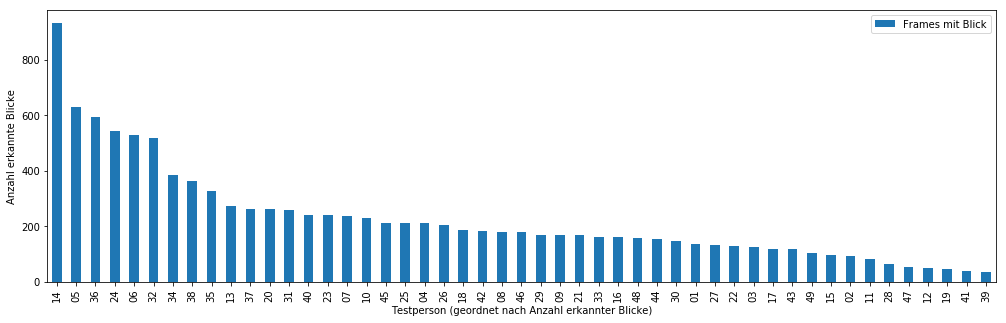

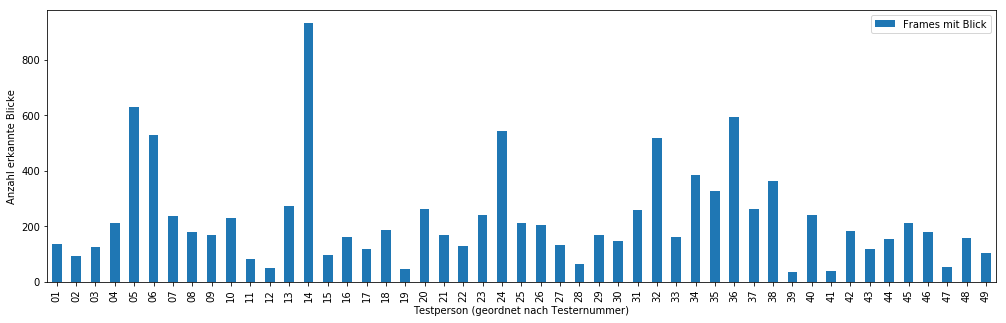

In [4]:
plt.rcParams["figure.figsize"] = (17, 5) # (w, h)

ax_1 = user_data[['Frames mit Blick', 'Test Person']].sort_values(by=['Frames mit Blick'], ascending=False)
ax_1 = ax_1.plot(kind='bar')
ax_1.set_xticklabels(user_data[['Test Person']].values.transpose()[0])
ax_1.set_xlabel("Testperson (geordnet nach Anzahl erkannter Blicke)")
ax_1.set_ylabel("Anzahl erkannte Blicke")

ax_2 = user_data[['Frames mit Blick', 'Test Person']].sort_values(by=['Test Person'], ascending=True).set_index("Test Person")
ax_2 = ax_2.plot(kind='bar')
ax_2.set_xlabel("Testperson (geordnet nach Testernummer)")
ax_2.set_ylabel("Anzahl erkannte Blicke")

top_ten = user_data[['Frames mit Blick', 'Test Person', 'Brille', 'Groesse', 'Bart']].sort_values(by=['Frames mit Blick'], ascending=False).head(10)

display(top_ten)

total_count = user_data[['Frames mit Blick']].sort_values(by=['Frames mit Blick'], ascending=False).sum()
top_ten_count = user_data[['Frames mit Blick']].sort_values(by=['Frames mit Blick'], ascending=False).head(10).sum()

percent_face = round(top_ten_count / (total_count/100), 2)

user_size = user_data[['Groesse', 'Frames mit Blick']].sort_values(by=['Frames mit Blick'], ascending=False).head(10).sum()

print("Gesamtzahl der Frames mit Blick: " + str(total_count.values[0]))
print("Gesamtzahl der Top 10 Tester Frames mit Blick: " + str(top_ten_count.values[0]))
print("Anteil Top 10 Tester an Gesamtzahl: " + str(percent_face.values[0]) + "%")


Am höchsten ist die Erkennungsrate bei den Testpersonen 14, 05, 36, 24, 06, 32, 34, 38, 35, 13. Diese Top 10 der Tester machen 42,07 % der Gesamtzahl der Erkannten Blicke aus.

Zudem fällt auf, dass unter diesen Top 10 kein Bartträger ist.

1 Brillenträgern der beste Tester ist, aber auch der einzige.

Die Durchschnittsgröße liegt hier bei 180cm.

**Ergebnis:** Besonders viele werden bei 12, 36, 06, 14, 32, 05, 34, 24, 48 erkannt. Fast keine bei 28, 41, 19, 11, 39, 02, 39.

<a id="cell2"></a>

# Frage 2: Verhältnis von “Erkannt” und “Nicht-Erkannt”

**Ziel:** Wie groß ist der Teil der irrelevanten Informationen (Nicht-Erkannt), im Verhältnis zu relevanten Informationen (Erkannt).

In [13]:
root = '../1_Daten/1_Raw'
file_names = []
test_person_14 = None

for subdir, dirs, files in os.walk(root):
    for file in files:
        if '14__annotation' not in file or '.csv' not in file:
            continue
        file_names.append(os.path.join(subdir, file).replace('\\', '/'))

user_data['Gesamtzahl Frames'] = 0
        
for f in file_names:
    df = pd.read_csv(f, sep=',', engine='python')
    test_person = str((df['annotation_test_person_id'][0]))[:-1]
    print(f)
    if '14__annotation' in f:
        test_person_14 = df
    user_data.loc[(user_data['Test Person'] == test_person), 'Gesamtzahl Frames'] = len(df)

../1_Daten/1_Raw/14__annotation_2019_06_12_16:41:50.csv
      client_id annotation_test_person_id  annotation_pos  annotation_aoi  \
0         cam_1                       14_               3              10   
1         cam_1                       14_               3              10   
2         cam_1                       14_               3              10   
3         cam_4                       14_               3              10   
4         cam_2                       14_               3              10   
5         cam_2                       14_               3              10   
6         cam_4                       14_               3              10   
7         cam_1                       14_               3              10   
8         cam_3                       14_               3              10   
9         cam_1                       14_               3              10   
10        cam_3                       14_               3              10   
11        cam_4     

Frames Gesamt: 13033
Frames mit Blick: 11120
Verhältnis zwischen Gesicht (53.96%) und Blick(46.04%)


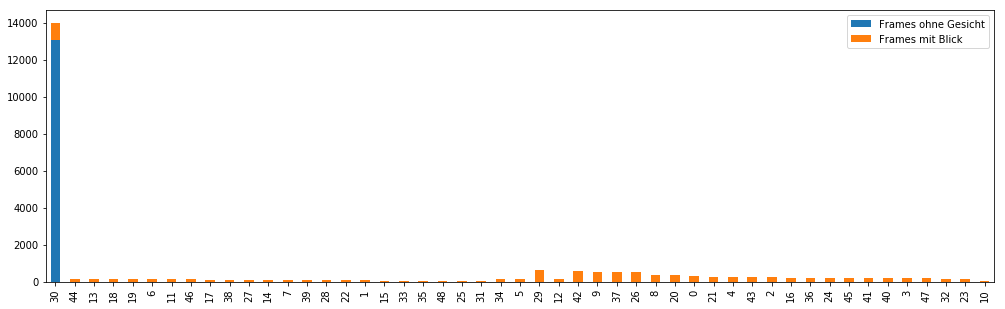

In [7]:
ax_1 = user_data[['Gesamtzahl Frames', 'Frames mit Blick']].rename(columns={'Gesamtzahl Frames': 'Frames ohne Gesicht'})
ax_1 = ax_1.sort_values(by=['Frames ohne Gesicht'], ascending=False)
ax_1.plot.bar(stacked=True)

sum_face = user_data['Gesamtzahl Frames'].sum()
sum_gaze = user_data['Frames mit Blick'].sum()

percent_face = str(round(sum_face / ((sum_face + sum_gaze)/100), 2))
percent_gaze = str(round(sum_gaze / ((sum_face + sum_gaze)/100), 2))

print("Frames Gesamt: " + str(sum_face))
print("Frames mit Blick: " + str(sum_gaze))
print("Verhältnis zwischen Gesicht (" + percent_face + "%) und Blick(" + percent_gaze + "%)")


**Ergebnis:** Verhältnis zwischen “Nicht-Erkannt” (98.46%) und Erkannt”(1.54%). Liegt einerseits daran, dass Clients bevor das erste mal ein Gesicht erkannt wird, 
mit einer Framerate von 24 fps laufen, dadurch werden viel mehr "Nicht-Erkannt" erzeugt. Zudem steht der Tester nicht permanent vor allen Cams. Würde man das auf Clientseite
schon rausfiltern, könnte 98.46% des Netzwerktraffics reduziert werden.

<a id="cell3"></a>
# Frage 3: Verteilung der Hits auf die einzelnen AOIs 

## Verteilung der Hits auf AOIs - gesamt

In [12]:
def count_aoi(frame_to_analyse, name):
    aoi_total = pd.DataFrame({'count' : frame_to_analyse.groupby('aoi')['client_id'].count()}).reset_index()

    aoi_total = aoi_total.sort_values(by=['count'], ascending=False)
    
    display(aoi_total.head(10))
    
    print("Total - " + name + ": " + str(aoi_total['count'].sum()))

    count = aoi_total.loc[aoi_total['aoi'].isin([1,3,4,6,9,13,22])]['count'].sum()
    print("Oben (1,3,4,6,9,13,22): " + str(count) + " Avg: " + str(count/7))

    count = aoi_total.loc[aoi_total['aoi'].isin([14, 15, 16, 17, 7])]['count'].sum()
    print("Mitte (14, 15, 16, 17, 7): " + str(count) + " Avg: " + str(count/5))

    count = aoi_total.loc[aoi_total['aoi'].isin([2,5,8,10,11,18,19,20,21,23])]['count'].sum()
    print("Unten (2,5,8,10,11,18,19,20,21,23): " + str(count) + " Avg: " + str(count/10))

    count = aoi_total.loc[aoi_total['aoi'].isin([24,25,26])]['count'].sum()
    print("Kühlschrank (24,25,26): " + str(count) + " Avg: " + str(count/3))
    
    print("------------------------")
    
    return aoi_total

In [13]:
aoi_list = []

filename = "../3_Lib/aois.json"

def fill_aoi_list():
    with open(filename, 'r') as f:
        return json.load(f)

aoi_list = fill_aoi_list()

,aoi,count
15,16,585
16,17,519
14,15,503
7,8,493
6,7,486
3,4,480
13,14,470
10,11,460
4,5,440
17,18,437


Total - Total: 11120
Oben (1,3,4,6,9,13,22): 2899 Avg: 414.14285714285717
Mitte (14, 15, 16, 17, 7): 2563 Avg: 512.6
Unten (2,5,8,10,11,18,19,20,21,23): 4132 Avg: 413.2
Kühlschrank (24,25,26): 1143 Avg: 381.0
------------------------


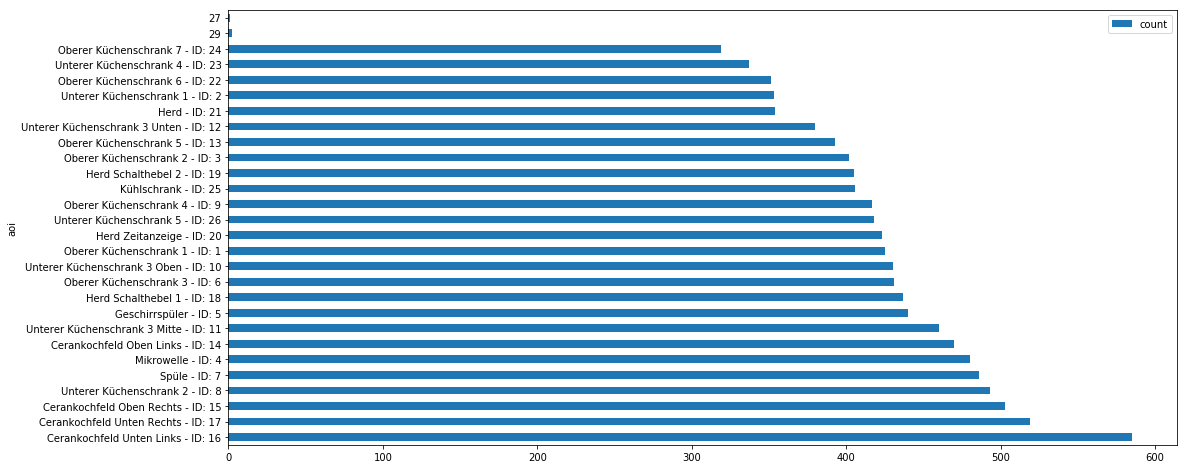

In [14]:
#Total count
base_frame = giant_data_frame[(giant_data_frame[['gaze_l_X','gaze_l_Y','gaze_l_Z']] != 0).all(axis=1)]

aoi_total = count_aoi(base_frame, "Total")

aoi_total = aoi_total.set_index('aoi')

for aoi in aoi_list:
    aoi_total.rename(index={aoi['aoi_id']: aoi['name'] + " - ID: " + str(aoi['aoi_id'])}, inplace=True)

ax = aoi_total['count'].sort_values(ascending=False).to_frame()
plt.rcParams["figure.figsize"] = (17, 8) # (w, h)
ax = ax.plot(kind="barh")

## Vergleich der AOIs der Positionen 1,3,5

In [15]:
#Positon 2
pos_1_frame = base_frame.loc[base_frame['position'] == 2]
count_aoi(pos_1_frame, "Position 2");

#Positon 4
pos_1_frame = base_frame.loc[base_frame['position'] == 4]
count_aoi(pos_1_frame, "Position 4");

,aoi,count
14,15,76
6,7,65
9,10,63
15,16,63
16,17,59
24,25,58
18,19,57
12,13,54
7,8,54
3,4,53


Total - Position 2: 1328
Oben (1,3,4,6,9,13,22): 335 Avg: 47.857142857142854
Mitte (14, 15, 16, 17, 7): 308 Avg: 61.6
Unten (2,5,8,10,11,18,19,20,21,23): 488 Avg: 48.8
Kühlschrank (24,25,26): 156 Avg: 52.0
------------------------


,aoi,count
25,26,100
15,16,93
17,18,93
6,7,85
16,17,85
3,4,84
8,9,82
19,20,77
24,25,73
2,3,72


Total - Position 4: 1837
Oben (1,3,4,6,9,13,22): 477 Avg: 68.14285714285714
Mitte (14, 15, 16, 17, 7): 378 Avg: 75.6
Unten (2,5,8,10,11,18,19,20,21,23): 688 Avg: 68.8
Kühlschrank (24,25,26): 234 Avg: 78.0
------------------------


**Ergebnis:** Die Positionen 2 und 4 haben recht ähnliche Ergebnisse, was ihre Top10 der AOIs angeht. Dominant sind bei beiden wieder die AOIs in der Arbeitsplatte

## Vergleich der AOIs der Positionen 1,3,5

In [16]:
#Positon 1
pos_1_frame = base_frame.loc[base_frame['position'] == 1]
count_aoi(pos_1_frame, "Position 1");

#Positon 3
pos_1_frame = base_frame.loc[base_frame['position'] == 3]
count_aoi(pos_1_frame, "Position 3");

#Positon 5
pos_1_frame = base_frame.loc[base_frame['position'] == 5]
count_aoi(pos_1_frame, "Position 5");

,aoi,count
15,16,237
10,11,217
7,8,195
13,14,186
9,10,181
19,20,179
5,6,175
6,7,173
16,17,171
11,12,166


Total - Position 1: 3996
Oben (1,3,4,6,9,13,22): 1029 Avg: 147.0
Mitte (14, 15, 16, 17, 7): 923 Avg: 184.6
Unten (2,5,8,10,11,18,19,20,21,23): 1534 Avg: 153.4
Kühlschrank (24,25,26): 342 Avg: 114.0
------------------------


,aoi,count
3,4,119
4,5,103
6,7,92
1,2,92
8,9,83
14,15,83
5,6,79
7,8,77
12,13,76
0,1,75


Total - Position 3: 1794
Oben (1,3,4,6,9,13,22): 531 Avg: 75.85714285714286
Mitte (14, 15, 16, 17, 7): 364 Avg: 72.8
Unten (2,5,8,10,11,18,19,20,21,23): 659 Avg: 65.9
Kühlschrank (24,25,26): 178 Avg: 59.333333333333336
------------------------


,aoi,count
16,17,139
15,16,137
14,15,136
24,25,116
13,14,107
7,8,107
17,18,97
22,23,88
21,22,83
5,6,83


Total - Position 5: 2165
Oben (1,3,4,6,9,13,22): 527 Avg: 75.28571428571429
Mitte (14, 15, 16, 17, 7): 590 Avg: 118.0
Unten (2,5,8,10,11,18,19,20,21,23): 763 Avg: 76.3
Kühlschrank (24,25,26): 233 Avg: 77.66666666666667
------------------------


**Ergebnis:** Diese Positionen sind daher am besten zu vergleichen, da sie alle den gleichen Abstand von der Küche haben. Dabei zeigt sich, dass über alle drei Positionen hinweg die AOIs auf der Arbeitsplatte (14, 15, 16, 17, 7) am besten abschneiden. Generell lässt sich im direkten Vergleich von 3 zu 5 feststellen, dass hierbei primär AOIs besser abschneiden, die direkt vor dem Nutzer liegen. Ein ähnlicher Effekt lässt sich auf bei Position 1 feststellen. AOIs unmittelbar vor der Position haben eine höhere Trefferrate. 

<a id="cell4"></a>
# Frage 4: Verteilung der Hits auf die einzelnen Positionen

## Verteilung der Hits auf Positionen - gesamt

**Ziel:** Wie ist die Trefferrate pro Position. Welche Position ermöglicht viele Treffer und welche Position erhält am wenigsten Treffer.

position
1    3996
2    1328
3    1794
4    1837
5    2165
Name: client_id, dtype: int64


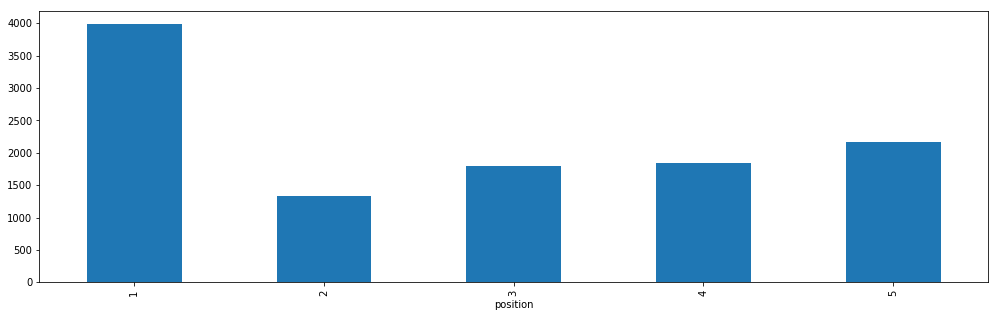

In [17]:
plt.rcParams["figure.figsize"] = (17, 5) # (w, h)
hits_total = giant_data_frame
hits_total_count = hits_total.groupby('position')['client_id'].count()
print(hits_total_count)


hits_total_count.plot('bar')

## Anteile von cam_2 und cam_3 an Position 1

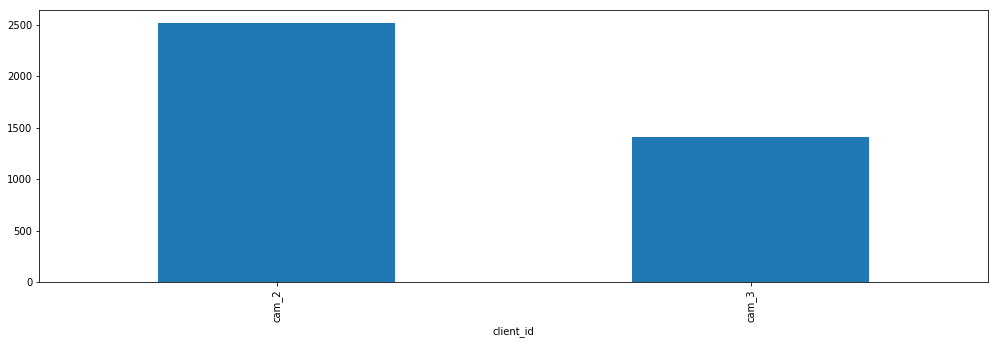

In [35]:
hits_total_1 = giant_data_frame
hits_total_1 = hits_total_1[((hits_total_1[['client_id']] == 'cam_2') | (hits_total_1[['client_id']] == 'cam_3')).all(axis=1)]

hits_total_1 = hits_total_1[((hits_total_1[['position']] == 1)).all(axis=1)]
hits_total_1_count = hits_total_1.groupby('client_id')['client_id'].count()

hits_total_1_count.plot('bar')

**Ergebnis:** Position 1 bekommt die meisten Treffer ab, da hier 2 Kameras gleichzeitig den Nutzer erfassen können. Trennt man die Daten auf nach (cam_2 und cam_3), so sieht man, dass 1_cam_2 in einem ähnlichen Verhältnis zu 3,4,5 und liegt. 2 schneidet am schlechtesten ab (Vermutung: zu nah an Küchenzeile). 1_cam_3 schlechter als 1_cam_2 (Vermutung: unsauberer Versuchsaufbau, da Pos 1 in Realität näher an cam_2).

Text(0, 0.5, 'Landmarke erkannt')

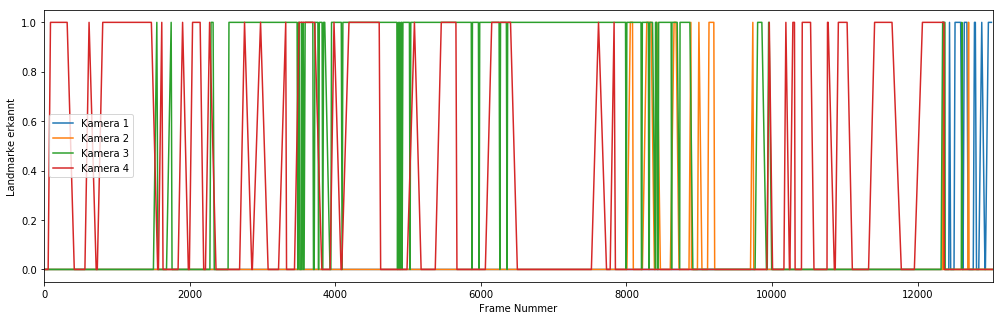

In [64]:
test_person_14 = test_person_14[['client_id', 'landmark_detection_success']]
cam_1 = test_person_14.loc[(test_person_14['client_id']== 'cam_1')]
cam_2 = test_person_14.loc[(test_person_14['client_id']== 'cam_2')]
cam_3 = test_person_14.loc[(test_person_14['client_id']== 'cam_3')]
cam_4 = test_person_14.loc[(test_person_14['client_id']== 'cam_4')]

ax = cam_1.plot()
cam_2.plot(ax=ax)
cam_3.plot(ax=ax)
cam_4.plot(ax=ax)

ax.legend(["Kamera 1", "Kamera 2", "Kamera 3", "Kamera 4"]);
ax.set_xlabel("Frame Nummer")
ax.set_ylabel("Landmarke erkannt")



<a id="cell5"></a>
# Frage 5: Verteilung der Hits auf die Clients

Erkannte Blicke - cam_1 (absolut/relativ): 2158 / 19.41 %
Erkannte Blicke - cam_2 (absolut/relativ): 2580 / 23.2 %
Erkannte Blicke - cam_3 (absolut/relativ): 2164 / 19.46 %
Erkannte Blicke - cam_4 (absolut/relativ): 4218 / 37.93 %


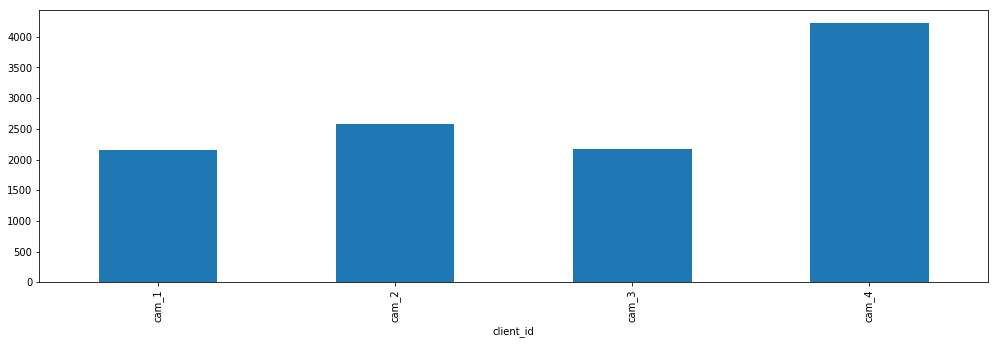

In [19]:
clients_total = giant_data_frame.groupby('client_id')['client_id'].count()

client_count_percent = (clients_total.values/clients_total.values.sum() * 100)
print("Erkannte Blicke - cam_1 (absolut/relativ): " + str(clients_total.values[0]) + " / " + str(client_count_percent[0].round(2)) + " %")
print("Erkannte Blicke - cam_2 (absolut/relativ): " + str(clients_total.values[1]) + " / " + str(client_count_percent[1].round(2)) + " %")
print("Erkannte Blicke - cam_3 (absolut/relativ): " + str(clients_total.values[2]) + " / " + str(client_count_percent[2].round(2)) + " %")
print("Erkannte Blicke - cam_4 (absolut/relativ): " + str(clients_total.values[3]) + " / " + str(client_count_percent[3].round(2)) + " %")

clients_total.plot('bar')

**Ergebnis:** Dass cam_4 deutlich mehr Daten aufgezeichnet hat, ist verständlich, da der Nutzer dort viel länger steht (Positionen 2,3,4). Cam_2 kann auch besser cam_3, da Versuchsaufbau fehlerhaft gewesen sein könnte. Warum ist aber cam_1 schlechter als cam_2?

<a id="cell6"></a>
# Frage 6: Personenbezogene Daten

In [20]:
glasses_true_avg = user_data.loc[(user_data['Brille']== True)][['Frames mit Blick']].mean(axis=0).values[0]
glasses_false_avg = user_data.loc[(user_data['Brille']== False)][['Frames mit Blick']].mean(axis=0).values[0]

glasses_true_beard_true_avg = user_data.loc[(user_data['Brille']== True) & (user_data['Bart']== True)][['Frames mit Blick']].mean(axis=0).values[0]
glasses_true_beard_false_avg = user_data.loc[(user_data['Brille']== True) & (user_data['Bart']== False)][['Frames mit Blick']].mean(axis=0).values[0]

male_avg = user_data.loc[(user_data['Geschlecht']== 'MALE')][['Frames mit Blick']].mean(axis=0).values[0]
female_avg = user_data.loc[(user_data['Geschlecht']== 'FEMALE')][['Frames mit Blick']].mean(axis=0).values[0]

beard_true_avg = user_data.loc[(user_data['Bart']== True)][['Frames mit Blick']].mean(axis=0).values[0]
beard_false_avg = user_data.loc[(user_data['Bart']== False)][['Frames mit Blick']].mean(axis=0).values[0]

print("Brille: " + str(glasses_true_avg))
print("Keine Brille: " + str(glasses_false_avg))

print("Brille Bart: " + str(glasses_true_beard_true_avg))
print("Brille kein Bart: " + str(glasses_true_beard_false_avg))

print("Mann: " + str(male_avg))
print("Frau: " + str(female_avg))
print("Bart: " + str(beard_true_avg))
print("Kein Bart: " + str(beard_false_avg))

Brille: 168.94736842105263
Keine Brille: 263.6666666666667
Brille Bart: 118.33333333333333
Brille kein Bart: 192.30769230769232
Mann: 231.66666666666666
Frau: 219.47368421052633
Bart: 124.28571428571429
Kein Bart: 244.04761904761904


## Verteilung von Größe und Alter

Text(0, 0.5, 'Alter')

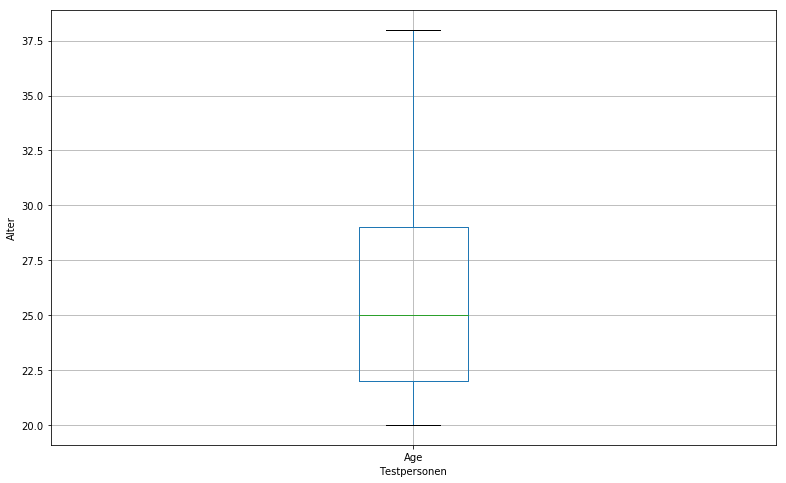

In [31]:
user = pd.read_csv('../1_Daten/participants.csv', sep=',', engine='python', encoding='utf-8')
plt.rcParams["figure.figsize"] = (13, 8)
plot_0 = user.boxplot(column=['Age'])
plot_0.set_xlabel("Testpersonen")
plot_0.set_ylabel("Alter")

#plot = user['Size (cm)'].hist(bins=10)
#plot.set_ylabel("Anzahl der Personen")
#plot.set_xlabel("Körpergröße")

## Kleine vs. Große Personen - Position 2 (nahe an cam_2)

In [30]:
print("Total Number: " + str(user["Beard"].count()))
print("Durschnittliches Alter: " + str(user["Age"].mean()))
print("Anzahl Barträger: " + str(user[(user['Beard'] == True)]["Beard"].count()))
print("Anzahl Brillenträger: " + str(user[(user['Glasses'] == True)]["Glasses"].count()))
print("Anzahl Geschlecht (männlich): " + str(user[(user['Gender'] == 'MALE')]["Gender"].count()))
print("Anzahl Geschlecht (weiblich): " + str(user[(user['Gender'] == 'FEMALE')]["Gender"].count()))

Total Number: 49
Durschnittliches Alter: 26.285714285714285
Anzahl Barträger: 7
Anzahl Brillenträger: 19
Anzahl Geschlecht (männlich): 30
Anzahl Geschlecht (weiblich): 19


In [22]:
user_small = user_data.loc[(user_data['Groesse'] <= 165)][['Test Person']]
user_big = user_data.loc[(user_data['Groesse'] >= 185)][['Test Person']]
small = []
big = []

for e in user_small.values.transpose()[0]:
    small.append(str(e) + "_")
    
for e in user_big.values.transpose()[0]:
    big.append(str(e) + "_")    

user_small_data_pos_2 = giant_data_frame[(giant_data_frame['tester'].isin(small))]

user_small_data_pos_2 = user_small_data_pos_2.loc[user_small_data_pos_2['position'] == 2].count().values[0]
user_big_data_pos_2 = giant_data_frame[giant_data_frame['tester'].isin(big)]
user_big_data_pos_2 = user_big_data_pos_2.loc[user_big_data_pos_2['position'] == 2].count().values[0]

print(user_small_data_pos_2)
print(user_big_data_pos_2)

224
594


## Kleine vs. Große Personen - Position 3 (weit von cam_2)

In [23]:
user_small = user_data.loc[(user_data['Groesse'] <= 160)][['Test Person']]
user_big = user_data.loc[(user_data['Groesse'] >= 190)][['Test Person']]
small = []
big = []

for e in user_small.values.transpose()[0]:
    small.append(str(e) + "_")
    
for e in user_big.values.transpose()[0]:
    big.append(str(e) + "_")    

user_small_data_pos_3 = giant_data_frame[(giant_data_frame['tester'].isin(small))]
user_small_data_pos_3 = user_small_data_pos_3.loc[user_small_data_pos_3['position'] == 3].count().values[0]
user_big_data_pos_3 = giant_data_frame[giant_data_frame['tester'].isin(big)]
user_big_data_pos_3 = user_big_data_pos_3.loc[user_big_data_pos_3['position'] == 3].count().values[0]

print(user_small_data_pos_3)
print(user_big_data_pos_3)

11
316


## Vergleich von Körpergröße und Hits - 5cm

In [24]:
def compare_size(step_size):
    size_hits = user_data[['Frames mit Blick', 'Groesse']].sort_values(by=['Groesse'])    
    
    test = user_data[['Frames mit Blick', 'Groesse']]   
    
    test = user_data[['Frames mit Blick', 'Groesse']]
    bins = pd.cut(test['Groesse'], range(155, 200, step_size))
    test = test.groupby(bins)['Frames mit Blick'].agg(['count', 'sum'])
    test['Result'] = test['sum']/test['count']
    test['Proportion (%)'] = (test[['Result']]/test[['Result']].sum() * 100)[['Result']]
    test = test.fillna(0)

    plot = test[['Result']].plot(kind='bar')
    plot.set_ylabel("Durschnittliche Anzahl erkannte Blicke")

    display(test)

## Vergleich von Körpergröße und Hits - 5cm

,count,sum,Result,Proportion (%)
Groesse,,,,
"(155, 160]",3,409,136.333333,7.664399
"(160, 165]",8,1169,146.125000,8.214868
"(165, 170]",7,1977,282.428571,15.877594
"(170, 175]",5,1196,239.200000,13.447367
"(175, 180]",4,1112,278.000000,15.628629
"(180, 185]",10,2679,267.900000,15.060826
"(185, 190]",7,1519,217.000000,12.199325
"(190, 195]",5,1059,211.800000,11.906991


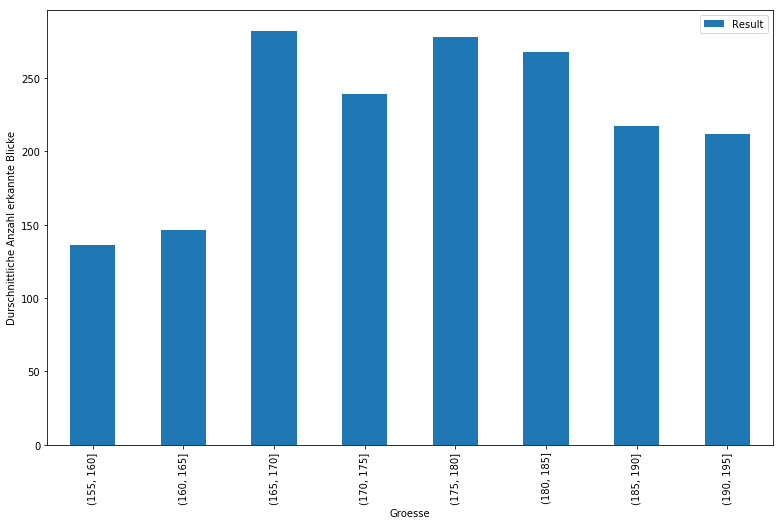

In [25]:
compare_size(5)

## Vergleich von Körpergröße und Hits - 1cm

,count,sum,Result,Proportion (%)
Groesse,,,,
"(155, 158]",3,409,136.333333,4.965943
"(158, 161]",0,0,0.000000,0.000000
"(161, 164]",6,753,125.500000,4.571338
"(164, 167]",5,810,162.000000,5.900851
"(167, 170]",4,1583,395.750000,14.415197
"(170, 173]",3,437,145.666667,5.305909
"(173, 176]",2,759,379.500000,13.823290
"(176, 179]",3,483,161.000000,5.864426
"(179, 182]",6,1756,292.666667,10.660385


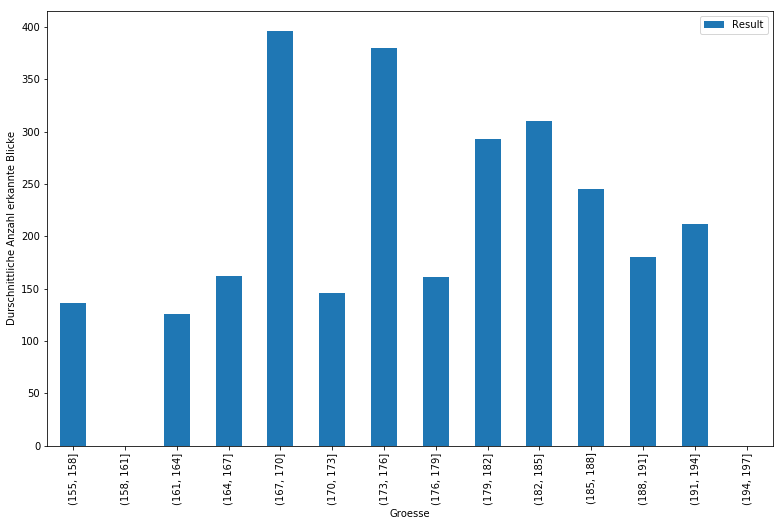

In [26]:
compare_size(3)

**Ergebnis:** Es zeig sich, dass kleine Personen (unter 165cm) und Große Personen (größer 186) schlechter erkannt werden. Kleine Personen deutlich schlechter. Besonders gut werden hingegen Personen 160cm - 185cm erkannt. 

In [20]:
def plotLinearRegression(data):
    x = data.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array
    y = data.iloc[:, 0].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(x, y)  # perform linear regression
    y_pred = linear_regressor.predict(x)  # make predictions

    plt.scatter(x, y)
    plt.plot(x, y_pred, color='red')
    plt.show()

    print("R-Value: " + str(r2_score(y, y_pred)))

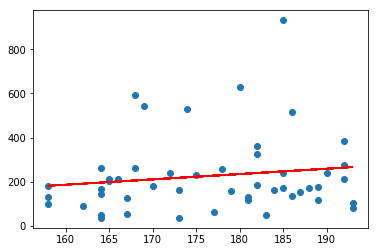

R-Value: 0.021436414881621957


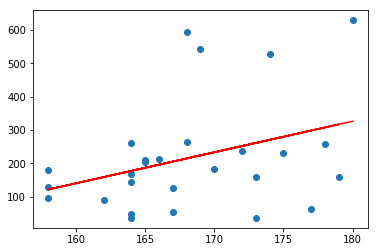

R-Value: 0.12362397623872812


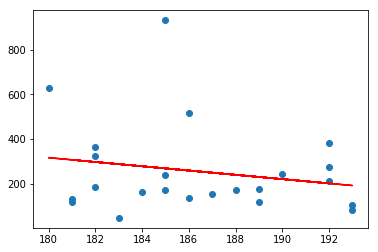

R-Value: 0.03956758354958256


In [33]:
# quelle: https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

dataframe = user_data[['Frames mit Blick','Groesse']]
dataframe_small = dataframe[dataframe['Groesse'] <= 180]
dataframe_big = dataframe[dataframe['Groesse'] >= 180]

plotLinearRegression(dataframe)
plotLinearRegression(dataframe_small)
plotLinearRegression(dataframe_big)


## Vergleich von Alter und Hits

,count,sum,Result,Proportion (%)
Alter,,,,
"(20, 21]",1,171,171.000000,6.179792
"(21, 22]",6,996,166.000000,5.999097
"(22, 23]",2,620,310.000000,11.203132
"(23, 24]",7,1386,198.000000,7.155549
"(24, 25]",4,681,170.250000,6.152688
"(25, 26]",2,259,129.500000,4.680018
"(26, 27]",4,1539,384.750000,13.904532
"(27, 28]",3,529,176.333333,6.372534
"(28, 29]",3,1257,419.000000,15.142298


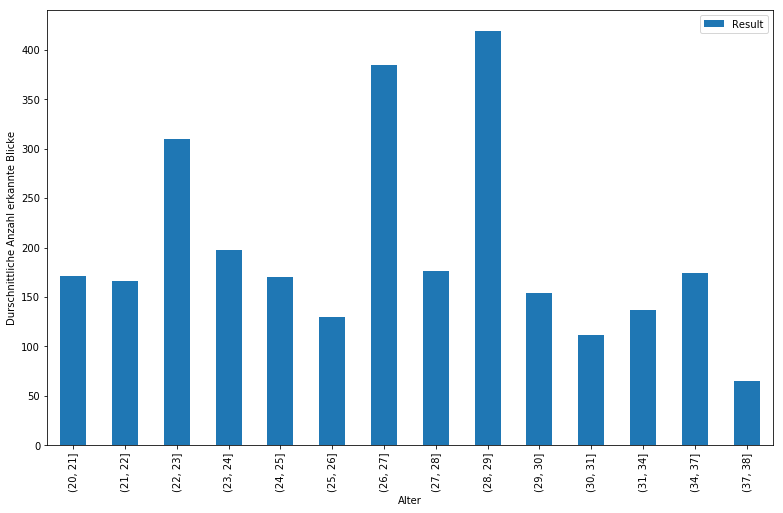

In [27]:
age_hits = user_data[['Frames mit Blick', 'Alter']].sort_values(by=['Alter'])

test = user_data[['Frames mit Blick', 'Alter']]
bins = pd.cut(test['Alter'], [20, 21,22,23,24,25,26,27,28,29,30,31,34,37,38])
test = test.groupby(bins)['Frames mit Blick'].agg(['count', 'sum'])
test['Result'] = test['sum']/test['count']

plot = test[['Result']].plot(kind='bar')
plot.set_ylabel("Durschnittliche Anzahl erkannte Blicke")

test['Proportion (%)'] = (test[['Result']]/test[['Result']].sum() * 100)[['Result']]
display(test)

**Ergebnis:** Die Daten zeigen kein erkennbares Muster zwischen Alter und Treffer pro Tester.